In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nmma
import json
import os
import bilby
from astropy.time import Time

In [84]:
from nmma.em.model import SimpleKilonovaLightCurveModel,GRBLightCurveModel, SVDLightCurveModel, KilonovaGRBLightCurveModel, GenericCombineLightCurveModel, SupernovaLightCurveModel

from nmma.em.injection import create_light_curve_data as cld

In [64]:
lcPath = './candidate_data/paper_candidates/v2/candidate_data/ZTF20abwysqyForced.dat'
df = pd.read_csv(lcPath, sep=' ', header=None, names=['t', 'filter', 'mag', 'mag_unc'])

trigger_time = 59087.18740740741
df['t'] = Time(pd.to_datetime(df['t'])).mjd
df['t'] = df['t'] - trigger_time

display(df)


,t,filter,mag,mag_unc
0,6.132072,i,20.193004,inf
1,6.181840,r,20.265292,inf
2,6.268993,g,20.107244,inf
3,7.218819,r,19.833552,inf
4,7.283854,g,19.838025,inf
5,8.166944,g,19.909915,inf
6,8.260023,r,20.097329,inf
7,-6.742778,g,21.236449,inf
8,-5.762164,r,21.351784,inf
9,-5.720660,g,21.167371,inf


In [19]:
snPath = './outdir/abwysqyForced_nugent-hyper/abwysqyForced_nugent-hyper_result.json'
grbPath = './outdir/abwysqyForced_TrPi2018/abwysqyForced_TrPi2018_result.json'
with open(snPath,"r") as f:
    snResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
with open (grbPath,"r") as f:
    grbResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)


In [88]:
grbResults['posterior']

,luminosity_distance,inclination_EM,log10_E0,thetaCore,thetaWing,log10_n0,p,log10_epsilon_e,log10_epsilon_B,Ebv,KNtimeshift,ksiN,L0,dL,b,q,ts,log_likelihood,log_prior
0,760.890835,0.655995,51.730769,0.311806,0.578721,-0.782234,2.913166,-0.152170,-1.858222,0.410458,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-9.647628,-15.050239
1,452.559116,0.623241,52.508718,0.327808,0.734971,-2.467347,2.377148,-1.627941,-1.975409,0.427928,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-8.899586,-15.208432
2,2543.450563,0.868613,52.741117,0.365214,1.095788,-0.374173,2.804276,-0.070324,-2.670773,0.351564,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.624298,-14.515607
3,4998.930076,0.746411,52.286948,0.341336,1.301897,-2.508060,2.289664,-0.654658,-1.096161,0.002701,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.187254,-13.685111
4,2291.400043,0.489612,51.021412,0.462575,1.065735,-0.647358,2.386646,-0.253448,-0.977212,0.254554,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.101028,-14.635949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1965.116307,0.381917,51.513709,0.299556,1.140804,-1.272135,2.644654,-0.596440,-1.468649,0.371403,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.096546,-15.326787
374,4294.374224,0.292769,51.971602,0.297630,0.488789,-0.702897,2.261428,-0.623656,-1.793515,0.256699,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.048587,-15.130998
375,3749.242207,0.392440,52.497250,0.182474,0.863106,-1.551302,2.574560,-0.638874,-1.537252,0.145955,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.990170,-14.548786
376,4061.615067,0.276128,52.273153,0.288549,0.826688,-3.005089,2.783521,-0.357209,-2.223391,0.100694,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.916825,-14.786370


In [86]:
sample_times = np.arange(0.01, 14, 0.1)
snModel = SupernovaLightCurveModel(sample_times=sample_times, model='nugent-hyper')
grbModel = GRBLightCurveModel(sample_times=sample_times, model='TrPi2018')

In [101]:
#quantiles = lambda x: 
grb_lc_params = [
    {key: np.quantile(value, q) for key, value in grbResults['posterior'].items()}
    for q in [0.16, 0.5, 0.84]
]
sn_lc_params = [
    {key: np.quantile(value, q) for key, value in snResults['posterior'].items()}
    for q in [0.16, 0.5, 0.84]
]
sn16, sn50, sn84 = (snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[0]), 
                    snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[1]), 
                    snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[2]))

grb16, grb50, grb84 = (grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[0]),
                       grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[1]),
                       grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[2]))


In [108]:
sn16[1]['g']

array([-13.08235764, -15.68583936, -16.38790588, -16.81076188,
       -17.11431728, -17.35128308, -17.54568223, -17.71050351,
       -17.85357019, -17.97996112, -18.09316108, -18.16565065,
       -18.21253908, -18.25748615, -18.30064624, -18.34215602,
       -18.38213708, -18.42069802, -18.45793627, -18.49393957,
       -18.52878721, -18.56255109, -18.59529657, -18.62708331,
       -18.65796584, -18.6879942 , -18.71721436, -18.74566869,
       -18.77339631, -18.80043342, -18.82681357, -18.85256794,
       -18.87772553, -18.90231337, -18.9263567 , -18.9498791 ,
       -18.97290269, -18.99544816, -19.01753499, -19.03918145,
       -19.06040477, -19.08122117, -19.10164595, -19.1216936 ,
       -19.14137777, -19.16071142, -19.17970681, -19.19837558,
       -19.21672876, -19.23477685, -19.25252983, -19.26999719,
       -19.28718798, -19.30411082, -19.32077394, -19.33718518,
       -19.35335205, -19.36928172, -19.38498105, -19.4004566 ,
       -19.41571467, -19.43076128, -19.44560222, -19.46

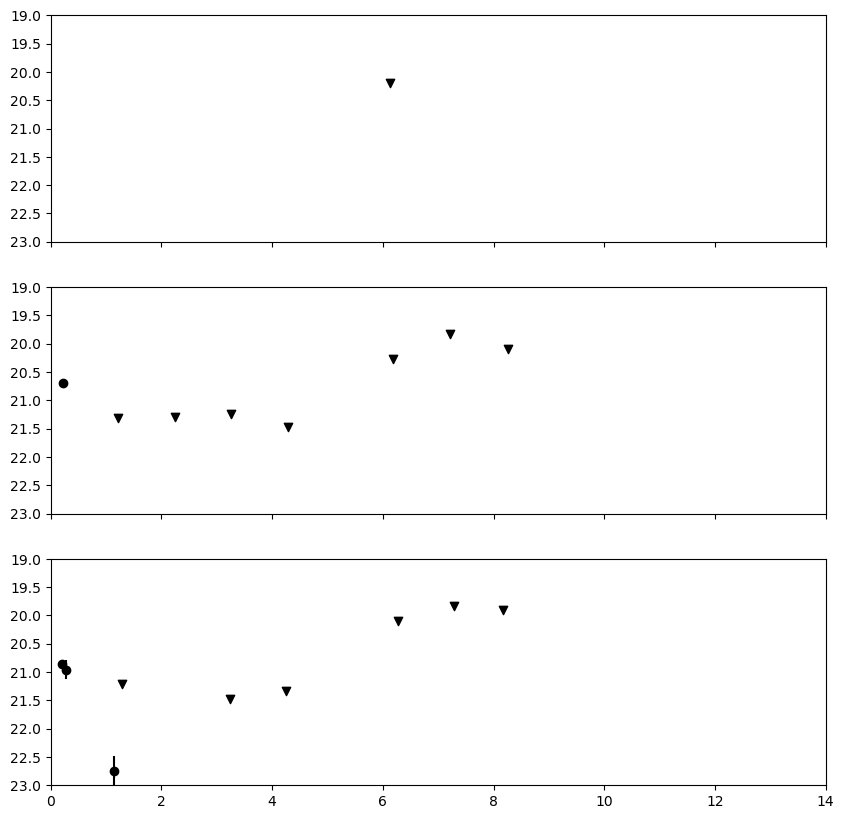

In [107]:
fig, axs = plt.subplots(3,1,figsize=(10, 10),sharex=True, sharey=True)
filters = ['i', 'r', 'g']

for i, filter in enumerate(filters):
    ax = axs[i]
    
    ax.fill_between(sample_times, grb16[1][filter], grb84[1][filter], color='C0', alpha=0.5)
    ax.plot(sample_times, grb50[1][filter], color='C0')
    
    try:
        detections = df[(df['filter'] == filter) & (df['mag_unc'] != np.inf)]
    except:
        detections = None
    try:
        non_detections = df[(df['filter'] == filter) & (df['mag_unc'] == np.inf)]
    except:
        non_detections = None
    #non_detections = df[(df['filter'] == filter) & (df['mag_unc'] is np.inf)]
    #display(detections)
    
    try: 
        ax.errorbar(detections['t'], detections['mag'], yerr=detections['mag_unc'], fmt='o', color='k') 
    except: 
        None
    try: 
        ax.scatter(non_detections['t'], non_detections['mag'], marker='v', color='k') 
    except: 
        None
    ax.invert_yaxis()
    ax.set_ylim(23, 19)
    ax.set_xlim(0,14)